In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot, rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# mesh paramters
nx = 81
dx = 0.25
nt = 6
dt = 0.002
gamma = 1.4

x = numpy.linspace(-10,10,nx)

In [39]:
# functions
# initial condition
def init_cond(nx):
    """
    Creates initial conditions for shock tube problem
    
    returns u which holds all initial conditions for u1, u2 and u3
    """
    # initialize rho
    rho_init = numpy.zeros(nx)
    rho_init[:int((nx-1)/2)] = 1.    # left side density = 1 kg/m^3
    rho_init[int((nx-1)/2):] = 0.125 # right side density = 0.125 kg/m^3
    
    # initialize u
    u_init = numpy.zeros(nx) # all velocity is initially zero
    
    #initialize pressure
    p_init = numpy.zeros(nx)
    p_init[:int((nx-1)/2)] = 100e3 # left side pressure = 100 kPa
    p_init[int((nx-1)/2):] = 10e3  # right side pressure = 10 kPa
    
    # initialize u
    u = numpy.ndarray(shape=(3, nx))
    u[0,:] = rho_init         # puts rho_init into each row to clear junk
    u[1,:] = rho_init*u_init  # same for rho*u and rho*e_t:
    u[2,:] = rho_init*(p_init/((gamma-1)*rho_init) + u_init**2/2)
    return u

# flux
def computeF(u):
    u1 = u[0]
    u2 = u[1]
    u3 = u[2]
    return numpy.array([u2,
                        u2**2/u1 + (gamma-1)*(u3 - 0.5*u2**2/u1),
                        (u3 + (gamma - 1)*(u3 - 0.5*u2**2/u1))*(u2/u1)])

# Richtmyer method
def richtmyer(u, dx, dt, nt):
    
    # initialize our multidimensional results array with dimension 3 by nt by nx
    u_n = numpy.ndarray(shape=(3, nt, nx))
    for i in range(0,nt):
        u_n[:,i,:] = u[:,:].copy() # replaces junk with initial condition
    
    # intermediate time variable array:
    u_half = numpy.zeros(shape=(3,nx))
    u_half = u_n[:,0,:].copy()
    F_half = numpy.zeros(shape=(3,nx))
    
    for t in range(1,nt):
        # first step
        F_half[:,:] = computeF(u[:,:])
        u_half[:,:-1] = 0.5*(u[:,1:] + u[:,:-1]) - dt/(2*dx)*(F_half[:,1:] - F_half[:,:-1])
        # second step
        F = computeF(u_half)
        u_n[:,t,1:] = u[:,:-1] - dt/dx*(F[:,1:] - F[:,:-1])
        u = u_n[:,t,:].copy()
    return u_n

In [40]:
# this block solves the problem
u = init_cond(nx)
u_n = richtmyer(u,dx,dt,nt)

time = 0.01
time_ind = int(time/dt)

velocity = numpy.zeros(nx)
velocity = u_n[1,time_ind,:]/u_n[0,time_ind,:]

pressure = numpy.zeros(nx)
pressure = (gamma - 1)*(u_n[2,time_ind,:] - 0.5*u_n[1,time_ind,:]**2/u_n[0,time_ind,:])

density = numpy.zeros(nx)
density = u_n[0,time_ind,:]

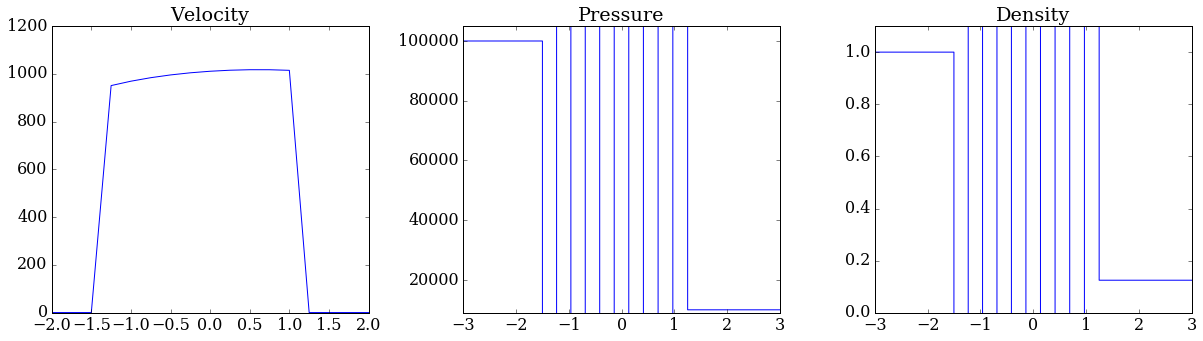

In [41]:
fig = pyplot.figure(figsize=(17,5));
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_title('Velocity')
ax1.set_xlim([-2,2])
ax1.set_ylim([-1,1200])
ax1.plot(x,velocity)

ax2.set_title('Pressure')
ax2.set_xlim([-3,3])
ax2.set_ylim([9e3,105e3])
ax2.plot(x,pressure)

ax3.set_title('Density')
ax3.set_xlim([-3,3])
ax3.set_ylim([0,1.1])
ax3.plot(x,density);

pyplot.tight_layout()

In [42]:
velocity

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,   950.69842956,
         969.06633469,   983.73966356,   995.31635186,  1004.21775108,
        1010.7263544 ,  1015.01035868,  1017.13364206,  1017.05221352,
        1014.5924807 ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
      

In [9]:
dt*nt


0.012

In [8]:
whos

Variable    Type           Data/Info
------------------------------------
ax1         AxesSubplot    Axes(0.0504739,0.104111;0.258883x0.7965)
ax2         AxesSubplot    Axes(0.386669,0.104111;0.258883x0.7965)
ax3         AxesSubplot    Axes(0.722864,0.104111;0.258883x0.7965)
computeF    function       <function computeF at 0x0000021585862F28>
density     ndarray        81: 81 elems, type `float64`, 648 bytes
dt          float          0.002
dx          float          0.25
fig         Figure         Figure(1360x400)
gamma       float          1.4
init_cond   function       <function init_cond at 0x0000021585862D90>
nt          int            6
numpy       module         <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
nx          int            81
pressure    ndarray        81: 81 elems, type `float64`, 648 bytes
pyplot      module         <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
rcParams    RcParams       agg.path.chunksize: 0\nan<...>e\nytick.minor.width: 0.5
ric